AVERAGE PIXELS LEVEL

In [ ]:
#combine average

import os
from PIL import Image
import numpy as np

def load_image(path):
    return Image.open(path)

def combine_images(rgb_image_path, ir_image_path):
    rgb_image = load_image(rgb_image_path)
    ir_image = load_image(ir_image_path)
    rgb_array = np.array(rgb_image)
    ir_array = np.array(ir_image)
    
    if rgb_array.shape != ir_array.shape:
        raise ValueError("RGB and IR images must have the same dimensions and number of channels")
    
    combined_array = (rgb_array.astype(np.float32) + ir_array.astype(np.float32)) / 2
    combined_array = combined_array.astype(np.uint8)  
    return Image.fromarray(combined_array)

def process_images(rgb_folder, ir_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    rgb_files = [f for f in os.listdir(rgb_folder) if os.path.isfile(os.path.join(rgb_folder, f))]
    for rgb_file in rgb_files:
        rgb_image_path = os.path.join(rgb_folder, rgb_file)
        ir_image_path = os.path.join(ir_folder, rgb_file)
        
        if os.path.exists(ir_image_path):
            combined_image = combine_images(rgb_image_path, ir_image_path)
            
            # Save the combined image
            output_image_path = os.path.join(output_folder, rgb_file)
            combined_image.save(output_image_path)
            print(f"Saved combined image: {output_image_path}")
        else:
            print(f"No corresponding IR image for {rgb_file}")

# Paths to the folders
rgb_folder = 'C:/Users/letri/Documents/project/data/Vis/images/val'
ir_folder = 'C:/Users/letri/Documents/project/data/Ir/images/val'
output_folder = 'C:/Users/letri/Documents/project/data/cb_average/images/val'

# Process and combine all images
process_images(rgb_folder, ir_folder, output_folder)


Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00970.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00971.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00972.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00973.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00974.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00975.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00976.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00977.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00978.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/val\00979.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_average/images/va

4 Channels

In [ ]:
import os
from PIL import Image
import numpy as np

def load_image(path, mode='RGB'):
    return Image.open(path).convert(mode)

def resize_image(image, size):
    return image.resize(size, Image.ANTIALIAS)

def combine_images(rgb_image_path, ir_image_path):
    # Load the images
    rgb_image = load_image(rgb_image_path, 'RGB')
    ir_image = load_image(ir_image_path, 'L')  # 'L' mode is for grayscale
    if rgb_image.size != ir_image.size:
        ir_image = resize_image(ir_image, rgb_image.size)

    rgb_array = np.array(rgb_image)
    ir_array = np.array(ir_image)

    combined_array = np.dstack((rgb_array, ir_array))
    return combined_array

def combine_and_save_images(vis_dir, ir_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    vis_images = sorted(os.listdir(vis_dir))
    ir_images = sorted(os.listdir(ir_dir))
    
    for vis_image, ir_image in zip(vis_images, ir_images):
        vis_image_path = os.path.join(vis_dir, vis_image)
        ir_image_path = os.path.join(ir_dir, ir_image)
        
        combined_image = combine_images(vis_image_path, ir_image_path)
        
        # Save the combined image as a .npy file
        output_path = os.path.join(output_dir, os.path.splitext(vis_image)[0] + '.npy')
        np.save(output_path, combined_image)
        print(f"Saved {output_path}")

vis_dir = 'C:/Users/letri/Documents/project/data/Vis/images/val'
ir_dir = 'C:/Users/letri/Documents/project/data/Ir/images/val'
output_dir = 'C:/Users/letri/Documents/project/data/cp_4dims/images/val'
combine_and_save_images(vis_dir, ir_dir, output_dir)


Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00970.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00971.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00972.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00973.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00974.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00975.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00976.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00977.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00978.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00979.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00980.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00981.npy
Saved C:/Users/letri/Documents/project/data/cp_4dims/images/val\00982.npy
Saved C:/Users/letri/Documents/project

WAVELET TRANSFORM

Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00000.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00013.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00014.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00015.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00016.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00017.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00018.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00019.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00020.png
Saved combined image: C:/Users/letri/Documents/project/data/cb_wavelet/images/train\00021.png
Saved combined image: C:/Users/letri/Documents/project/data/

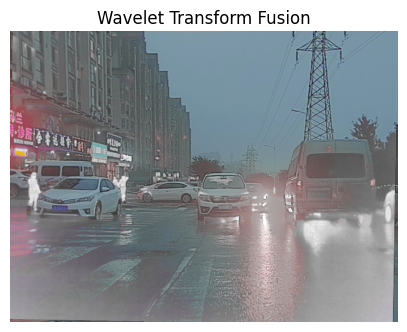

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pywt

def load_image(path):
    return cv2.imread(path)

def wavelet_fusion(visible_img, ir_img):
    if len(ir_img.shape) == 2 or ir_img.shape[2] == 1:
        ir_img_colored = cv2.cvtColor(ir_img, cv2.COLOR_GRAY2BGR)
    else:
        ir_img_colored = ir_img
    
    coeffs_visible = pywt.dwt2(visible_img, 'db1')
    coeffs_ir = pywt.dwt2(ir_img_colored, 'db1')
    
    fused_coeffs = []
    for v, i in zip(coeffs_visible, coeffs_ir):
        if isinstance(v, tuple):
            fused_coeffs.append(tuple(np.maximum(v_sub, i_sub) for v_sub, i_sub in zip(v, i)))
        else:
            fused_coeffs.append(np.maximum(v, i))
    
    fused_image = pywt.idwt2(tuple(fused_coeffs), 'db1')
    return np.uint8(fused_image)

def process_images(rgb_folder, ir_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    rgb_files = [f for f in os.listdir(rgb_folder) if os.path.isfile(os.path.join(rgb_folder, f))]
    processed_files = []
    
    for rgb_file in rgb_files:
        rgb_image_path = os.path.join(rgb_folder, rgb_file)
        ir_image_path = os.path.join(ir_folder, rgb_file)
        
        if os.path.exists(ir_image_path):
            visible_image = load_image(rgb_image_path)
            ir_image = load_image(ir_image_path)
            
            combined_image = wavelet_fusion(visible_image, ir_image)
            output_image_path = os.path.join(output_folder, rgb_file)
            cv2.imwrite(output_image_path, combined_image)
            print(f"Saved combined image: {output_image_path}")
            processed_files.append(rgb_file)
        else:
            print(f"No corresponding IR image for {rgb_file}")
    
    return processed_files

rgb_folder = 'C:/Users/letri/Documents/project/data/Vis/images/train'
ir_folder = 'C:/Users/letri/Documents/project/data/Ir/images/train'
output_folder = 'C:/Users/letri/Documents/project/data/cb_wavelet/images/train'

rgb_files = process_images(rgb_folder, ir_folder, output_folder)

if rgb_files: 
    sample_image_path = os.path.join(output_folder, rgb_files[0])
    sample_image = cv2.imread(sample_image_path)
    plt.figure(figsize=(5, 5))
    plt.title("Wavelet Transform Fusion")
    plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No images were processed.")


ADDING AND MULTIPLYING

In [ ]:
import os
from PIL import Image
import numpy as np

def load_image(path):
    return Image.open(path)

def combine_images(rgb_image_path, ir_image_path, method='mul'):
    rgb_image = load_image(rgb_image_path)
    ir_image = load_image(ir_image_path)
    rgb_array = np.array(rgb_image)
    ir_array = np.array(ir_image)
    
    if rgb_array.shape != ir_array.shape:
        raise ValueError("RGB and IR images must have the same dimensions and number of channels")
    

    if method == 'add':
        combined_array = rgb_array.astype(np.float32) + ir_array.astype(np.float32)
        #255 + 255 > 255 ==> can not save like images => save numpy type
    elif method == 'mul':
        combined_array = rgb_array.astype(np.float32) * ir_array.astype(np.float32)
    else:
        raise ValueError("Invalid combination method. Choose 'add', or 'mul'.")
    
    combined_array = combined_array.astype(np.uint8) 
    return combined_array

def process_images(rgb_folder, ir_folder, output_folder, method='average'):
    os.makedirs(output_folder, exist_ok=True)
    rgb_files = [f for f in os.listdir(rgb_folder) if os.path.isfile(os.path.join(rgb_folder, f))]
    for rgb_file in rgb_files:
        rgb_image_path = os.path.join(rgb_folder, rgb_file)
        ir_image_path = os.path.join(ir_folder, rgb_file)
        
        if os.path.exists(ir_image_path):
            combined_array = combine_images(rgb_image_path, ir_image_path, method=method)
            
            # Save the combined image as npy
            output_image_path = os.path.join(output_folder, rgb_file.replace('.jpg', '.npy').replace('.png', '.npy'))
            np.save(output_image_path, combined_array)
            print(f"Saved combined image as npy: {output_image_path}")
        else:
            print(f"No corresponding IR image for {rgb_file}")

# Paths to the folders
rgb_folder = 'C:/Users/letri/Documents/project/single_modality/data/Vis/images/train'
ir_folder = 'C:/Users/letri/Documents/project/single_modality/data/Ir/images/train'
output_folder = 'C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train'

# Process and combine all images using addition method
process_images(rgb_folder, ir_folder, output_folder, method='add')

# Process and combine all images using multiplication method
#process_images(rgb_folder, ir_folder, output_folder, method='mul')


Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00000.npy
Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00013.npy
Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00014.npy
Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00015.npy
Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00016.npy
Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00017.npy
Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00018.npy
Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00019.npy
Saved combined image as npy: C:/Users/letri/Documents/project/early_fusion/data/cb_add/images/train\00020.npy
Saved comb